In [1]:
import pandas as pd
import numpy as np
from io import StringIO

In [2]:
csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [3]:
df = pd.DataFrame([
    ['green', 'M', 10.2, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2']],
    columns=['color', 'size', 'price', 'classlabel']

)

df

,color,size,price,classlabel
0,green,M,10.2,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [4]:
size_mapping = {'XL': 3, 'L': 2, 'M': 1}
df['size'] = df['size'].map(size_mapping)

df

,color,size,price,classlabel
0,green,1,10.2,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [5]:
inv_size_mapping = {v:k for k, v in size_mapping.items()}

df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: str

In [6]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel'])) }
class_mapping

df['classlabel'] = df['classlabel'].map(class_mapping)

df

,color,size,price,classlabel
0,green,1,10.2,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [7]:

from sklearn.preprocessing import LabelEncoder

clas_le = LabelEncoder()

y = clas_le.fit_transform(df['classlabel'].values)

y

array([1, 0, 1])

In [8]:
clas_le.inverse_transform(y)

array([1, 0, 1])

In [9]:
df_wine = pd.read_csv(
'https://archive.ics.uci.edu/ml/'
'machine-learning-databases/wine/wine.data',
header=None
)

In [10]:
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [11]:
df_wine.columns = ['Class label', 'Alcohol',
 'Malic acid', 'Ash',
 'Alcalinity of ash', 'Magnesium',
 'Total phenols', 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color intensity', 'Hue',
 'OD280/OD315 of diluted wines',
 'Proline']

In [12]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
df_wine['Class label'].unique()

array([1, 2, 3])

In [14]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values


X_train, X_test , y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=1)

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


### Normalization:
- Scales data to [0, 1]
$$
x_{\text{norm}}^{(i)} = \frac{x^{(i)} - x_{\min}}{x_{\max} - x_{\min}}
$$

### Standardization:
$$
x_{\text{std}}^{(i)} = \frac{x^{(i)} - \mu}{\sigma}
$$

### Robust scaler

Good for models sensitive to outliers

$$
x_{\text{robust}}^{(i)} =
\frac{x^{(i)} - \operatorname{median}(x)}
{Q_{75}(x) - Q_{25}(x)}

$$

In [16]:
nomalizer = MinMaxScaler()
X_train_norm = nomalizer.fit_transform(X_train)
X_test_norm = nomalizer.transform(X_test)

stdscaler = StandardScaler()

X_train_std = stdscaler.fit_transform(X_train)
X_test_std = stdscaler.transform(X_test)

robustscaler = RobustScaler()

X_train_rbs = robustscaler.fit_transform(X_train)
X_test_rbs = robustscaler.transform(X_test)

### Overfitting
overfitting means the model fits the parameters too closely with regard
to the particular observations in the training dataset but does not generalize well to new data;
**What to to**

* Collect more training data
* Introduce a penalty for complexity via regularization
* Choose a simpler model with fewer parameters
* Reduce the dimensionality of the data

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

### Logistic Regression Regularization (L1 vs L2)

For logistic regression, regularization is added to the loss to penalize large weights.

- **L1 regularization (Lasso):** encourages sparse weights (feature selection)
$$
\Omega_{L1}(\mathbf{w}) = \lVert \mathbf{w} \rVert_1 = \sum_{j=1}^{m} |w_j|
$$

- **L2 regularization (Ridge):** shrinks weights smoothly toward zero
$$
\Omega_{L2}(\mathbf{w}) = \frac{1}{2}\lVert \mathbf{w} \rVert_2^2 = \frac{1}{2}\sum_{j=1}^{m} w_j^2
$$

With regularization strength $\lambda$, the objective is:
$$
\mathcal{J}(\mathbf{w}, b) = \text{log-loss}(\mathbf{w}, b) + \lambda\,\Omega(\mathbf{w})
$$

In [18]:
lr = OneVsRestClassifier(
    LogisticRegression(solver='liblinear', C=1.0, l1_ratio=1.0)
)

lr.fit(X_train_std, y_train)

print(f'Training accuracy: {lr.score(X_train_std, y_train)}')

print(f'Test accuracy: {lr.score(X_test_std, y_test)}')

lr.estimators_[1].coef_

Training accuracy: 1.0
Test accuracy: 0.9814814814814815


array([[-1.68954191, -0.37315309, -0.82487397,  0.6814459 , -0.12033985,
         0.        ,  0.39907828,  0.01215369,  0.24751641, -1.42654471,
         1.05827694,  0.        , -2.22884341]])

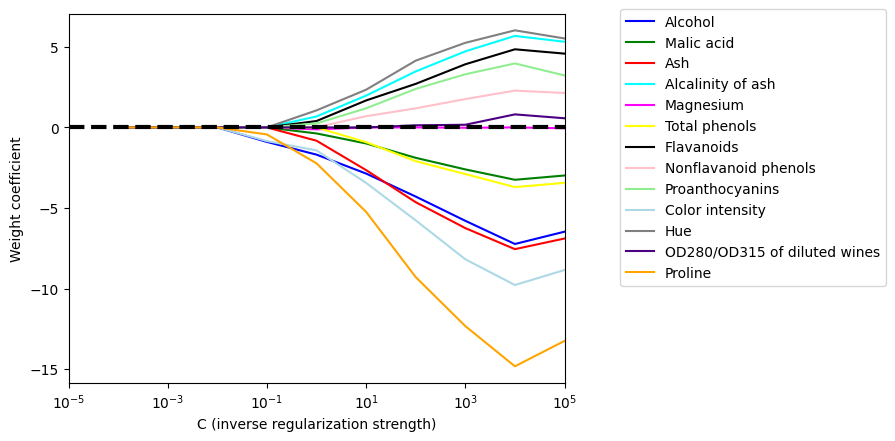

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
    
    lr = OneVsRestClassifier(
    LogisticRegression(solver='liblinear', C=10.**c, l1_ratio=1.0)
        )
    lr.fit(X_train_std, y_train)
    weights.append(lr.estimators_[1].coef_.ravel())
    params.append(10**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

In [20]:
from sbs import SBS
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)


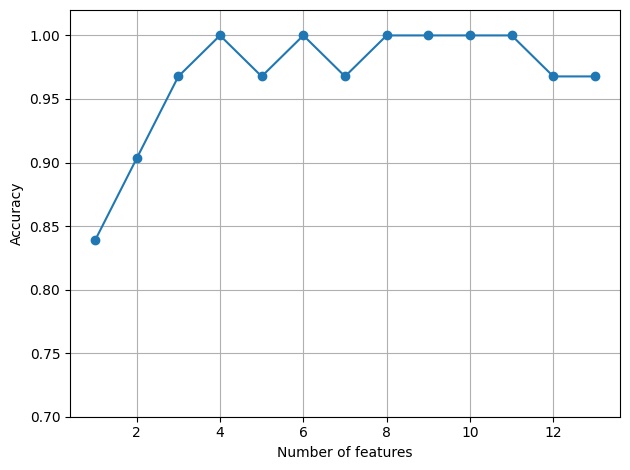

In [21]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()


In [22]:
sbs.subsets_[10]

(0, 5, 9)

 1) Proline                        0.179927
 2) Color intensity                0.153158
 3) Flavanoids                     0.146123
 4) Alcohol                        0.138224
 5) OD280/OD315 of diluted wines   0.114818
 6) Hue                            0.077525
 7) Total phenols                  0.058236
 8) Malic acid                     0.030856
 9) Alcalinity of ash              0.030000
10) Proanthocyanins                0.025713
11) Magnesium                      0.025135
12) Nonflavanoid phenols           0.011548
13) Ash                            0.008738


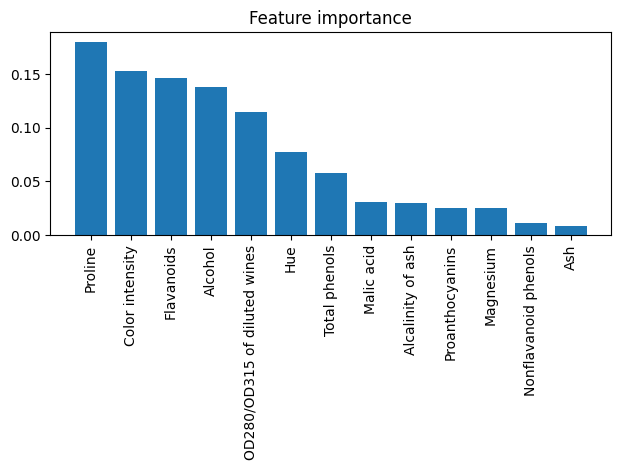

In [23]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

## Random Forest with SHAP and LIME

This section trains a Random Forest classifier and explains predictions using:
- **SHAP** for global and local feature contributions
- **LIME** for local, instance-level explanations

In [24]:
import matplotlib.pyplot as plt
import shap
from lime.lime_tabular import LimeTabularExplainer
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]
rf_model = RandomForestClassifier(n_estimators=500, random_state=1)
rf_model.fit(X_train, y_train)

print(f'RF training accuracy: {rf_model.score(X_train, y_train):.4f}')
print(f'RF test accuracy: {rf_model.score(X_test, y_test):.4f}')

RF training accuracy: 1.0000
RF test accuracy: 1.0000


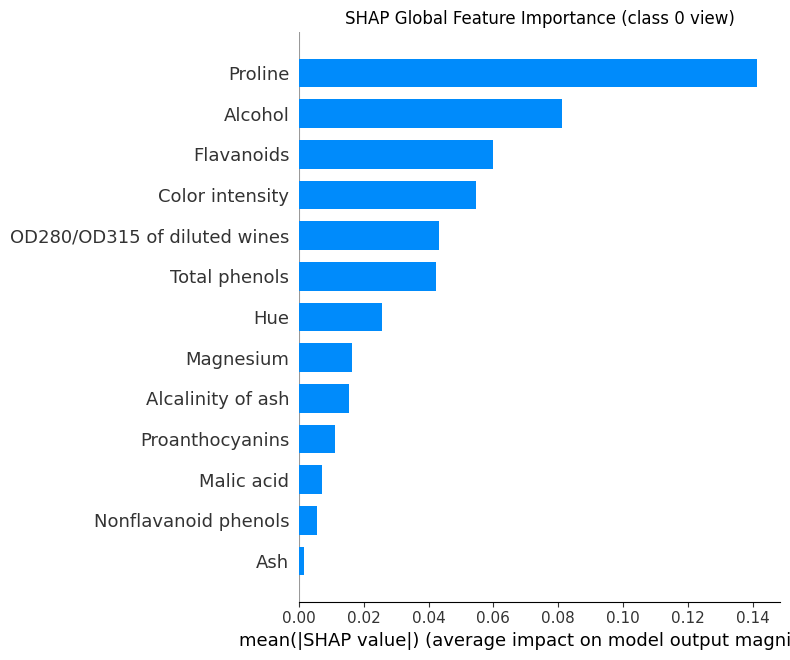

In [25]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

if isinstance(shap_values, list):
    shap_matrix = shap_values[0]
elif isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:
    shap_matrix = shap_values[:, :, 0]
else:
    shap_matrix = shap_values

plt.figure(figsize=(8, 4))
shap.summary_plot(shap_matrix, X_test, feature_names=feat_labels, plot_type='bar', show=False)
plt.title('SHAP Global Feature Importance (class 0 view)')
plt.tight_layout()
plt.show()

In [26]:
sample_idx = 0
sample = X_test[sample_idx]
pred_class = rf_model.predict(sample.reshape(1, -1))[0]

if isinstance(shap_values, list):
    local_shap = shap_values[int(pred_class)][sample_idx] if int(pred_class) < len(shap_values) else shap_values[0][sample_idx]
elif isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:
    class_pos = np.where(rf_model.classes_ == pred_class)[0][0]
    local_shap = shap_values[sample_idx, :, class_pos]
else:
    local_shap = shap_values[sample_idx]

local_importance = pd.Series(local_shap, index=feat_labels).sort_values(key=np.abs, ascending=False)
print(f'True label: {y_test[sample_idx]}, Predicted label: {pred_class}')
display(local_importance.head(10).to_frame('SHAP contribution'))

True label: 3, Predicted label: 3


,SHAP contribution
Flavanoids,0.199906
Alcohol,0.059607
Proline,0.047723
Total phenols,0.045458
Color intensity,0.037739
OD280/OD315 of diluted wines,0.037661
Proanthocyanins,0.033211
Malic acid,0.028933
Hue,-0.028328
Alcalinity of ash,0.011865


Top LIME feature contributions:
Flavanoids <= 1.18: 0.2288
Total phenols <= 1.73: 0.0423
3.07 < Color intensity <= 4.65: -0.0357
493.25 < Proline <= 676.50: 0.0326
Proanthocyanins <= 1.26: 0.0291
13.05 < Alcohol <= 13.59: 0.0273
Alcalinity of ash > 21.52: 0.0168
Nonflavanoid phenols > 0.43: 0.0141


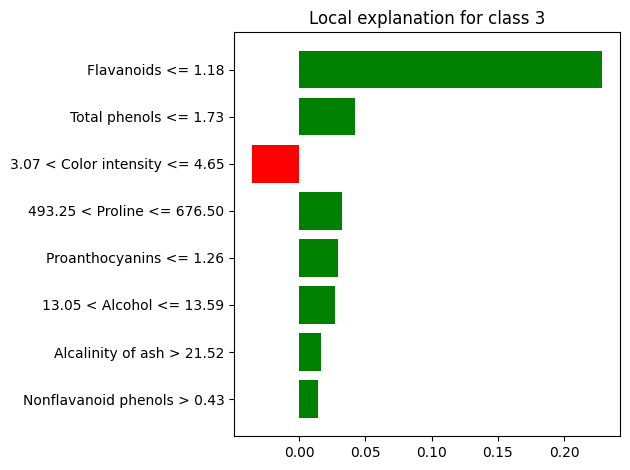

In [27]:
lime_explainer = LimeTabularExplainer(
    training_data=X_train,
    feature_names=list(feat_labels),
    class_names=[str(c) for c in rf_model.classes_],
    mode='classification',
    discretize_continuous=True
)

lime_exp = lime_explainer.explain_instance(
    data_row=X_test[sample_idx],
    predict_fn=rf_model.predict_proba,
    num_features=8,
    top_labels=1
)

print('Top LIME feature contributions:')
for feature, weight in lime_exp.as_list(label=lime_exp.top_labels[0]):
    print(f'{feature}: {weight:.4f}')

fig = lime_exp.as_pyplot_figure(label=lime_exp.top_labels[0])
plt.tight_layout()
plt.show()

In [28]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold',
      'criterion:', X_selected.shape[1])
# Number of features that meet this threshold criterion: 5
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

Number of features that meet this threshold criterion: 5
 1) Proline                        0.179927
 2) Color intensity                0.153158
 3) Flavanoids                     0.146123
 4) Alcohol                        0.138224
 5) OD280/OD315 of diluted wines   0.114818


,SHAP,LIME
Flavanoids,0.199906,0.228835
Alcohol,0.059607,0.027270
Proline,0.047723,0.032601
Total phenols,0.045458,0.042287
Color intensity,0.037739,-0.035702
OD280/OD315 of diluted wines,0.037661,0.000000
Proanthocyanins,0.033211,0.029111
Malic acid,0.028933,0.000000
Hue,-0.028328,0.000000
Alcalinity of ash,0.011865,0.016794


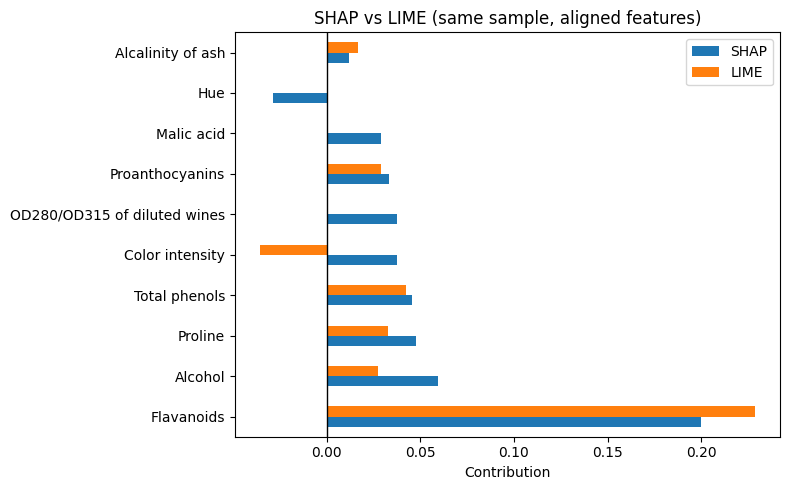

In [29]:
# Compare SHAP vs LIME for the same explained sample
def _map_lime_rule_to_feature(rule_text, feature_names):
    for feature_name in feature_names:
        if feature_name in rule_text:
            return feature_name
    return rule_text

lime_pairs = lime_exp.as_list(label=lime_exp.top_labels[0])
lime_contrib = {}
for rule, weight in lime_pairs:
    mapped_feature = _map_lime_rule_to_feature(rule, feat_labels)
    lime_contrib[mapped_feature] = lime_contrib.get(mapped_feature, 0.0) + weight

shap_series = local_importance.copy()
shap_abs_top = shap_series.abs().sort_values(ascending=False).head(10).index

comparison_df = pd.DataFrame({
    'SHAP': shap_series.reindex(shap_abs_top),
    'LIME': pd.Series(lime_contrib).reindex(shap_abs_top).fillna(0.0)
}).sort_values(by='SHAP', key=np.abs, ascending=False)

display(comparison_df)

ax = comparison_df.plot(kind='barh', figsize=(8, 5))
ax.set_title('SHAP vs LIME (same sample, aligned features)')
ax.set_xlabel('Contribution')
ax.axvline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show()